# TASK-4

Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

# WORK FLOW

Data Collection: Gather tweets mentioning a brand over the past month.
    
Preprocessing: Clean the text, remove stop words, and tokenize the tweets.
    
Sentiment Analysis: Apply sentiment analysis to assign sentiment scores (-1 to +1) to each tweet.
    
Visualization: Create a time series plot of sentiment scores over the month, generate a word cloud of most frequent positive/negative words, and display a histogram of sentiment distributions.

Insights: Note a spike in negative sentiment after a specific event and positive sentiment around product features.

# Data Collection



Choose the Platform and Data Source: Select social media platforms (e.g., Twitter, Facebook, Reddit) where discussions about the topic or brand are prevalent.

Collect Data: Use APIs or web scraping tools to gather relevant posts, comments, and mentions related to the topic or brand.

Ensure you have a sufficient volume of data for meaningful analysis.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from rich.console import Console
console=Console()


In [1]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# loading the file of data

In [2]:
import pandas as pd

# Load Data
df = pd.read_csv('C:\\Users\\NIHARIKA\\Documents\\intern\\taskFour\\twitter_training.csv')

# Display column names
print(df.columns)


Index(['Tweet ID', 'entity', 'sentiment', 'Tweet content'], dtype='object')


In [3]:
df.head(10)

,Tweet ID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   Tweet content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


# Preprocess Text Data

In [5]:
print("Columns:", df.columns)
print("First few rows:", df.head())


Columns: Index(['Tweet ID', 'entity', 'sentiment', 'Tweet content'], dtype='object')
First few rows:    Tweet ID       entity sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                       Tweet content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [8]:
# Fill non-string text values with empty strings
df['Tweet content'] = df['Tweet content'].fillna('')

# Display updated DataFrame
console.print("Updated DataFrame with non-string values handled:", df.head())


Updated DataFrame with non-string values handled:    Tweet ID       entity sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                       Tweet content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...

In [9]:
# Ensure NLTK stopwords are downloaded
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NIHARIKA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NIHARIKA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
from nltk.stem import WordNetLemmatizer
# Initialize the lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [15]:
# Function to clean and preprocess text
def clean_and_preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.strip().lower()  # Convert to lowercase and strip spaces
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatize and remove stop words
    return ' '.join(words)


In [16]:
# Convert all entries in the tweet content column to strings and handle NaN values
df['text'] = df['text'].astype(str).fillna('')

# Apply the advanced cleaning function
df['cleaned_text'] = df['text'].apply(clean_and_preprocess_text)

# Proceed with the rest of the steps


KeyError: 'text'

# Step 1: Sentiment Analysis Model

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming df, X_train_vectors, X_test_vectors, y_train, y_test, classifier are already defined from previous steps

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['sentiment'], test_size=0.2, random_state=42)

# Create a TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform on training data
X_train_vectors = vectorizer.fit_transform(X_train)

# Transform test data
X_test_vectors = vectorizer.transform(X_test)

# Train a Logistic Regression classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_vectors, y_train)

# Predict on test data
y_pred = classifier.predict(X_test_vectors)

# Evaluate performance
print(classification_report(y_test, y_pred))


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['sentiment'], test_size=0.2, random_state=42)

# Create a TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# Fit and transform on training data
X_train_vectors = vectorizer.fit_transform(X_train)

# Transform test data
X_test_vectors = vectorizer.transform(X_test)

# Train a Logistic Regression classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_vectors, y_train)

# Predict on test data
y_pred = classifier.predict(X_test_vectors)

# Evaluate performance
print(classification_report(y_test, y_pred))


KeyError: 'cleaned_text'

# Step 2: Evaluate Model Performance

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 0.68
Precision: 0.68
Recall: 0.68
F1-score: 0.68


# Step 3: vizualization

Explanation:

**Confusion Matrix Visualization:

Calculates the confusion matrix using confusion_matrix(y_test, y_pred).

Plots the confusion matrix using sns.heatmap() with annotations to display true positive, false positive, true negative, and false negative values.


**Classification Report Visualization:

Computes the classification report using classification_report(y_test, y_pred, output_dict=True).

Converts the report to a DataFrame and uses sns.heatmap() to visualize precision, recall, F1-score, and support for each class.

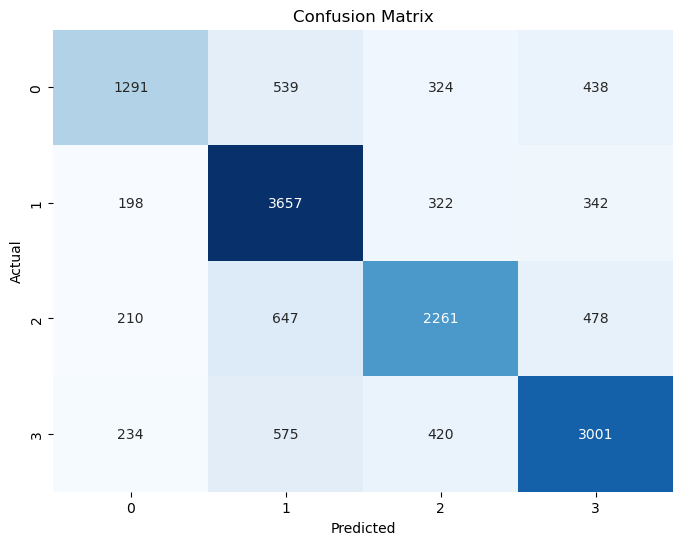

In [22]:
from sklearn.metrics import confusion_matrix
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


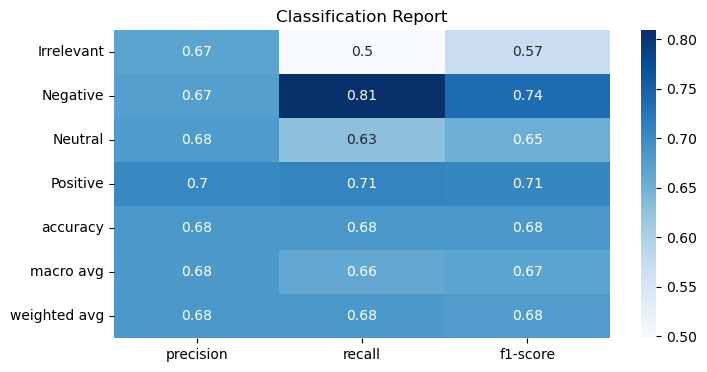

In [23]:
# Plot classification report
plt.figure(figsize=(8, 4))
report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

# Step 4: Interactive Visualization

This interactive visualization allows you to hover over cells to see detailed metrics (precision, recall, F1-score) for each sentiment class. Adjust the code as needed to integrate it with your specific data and classifier.

In [33]:
import plotly.graph_objects as go
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['sentiment'], test_size=0.2, random_state=42)

# Create a TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Train a Logistic Regression classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_vectors, y_train)

# Predict on test data
y_pred = classifier.predict(X_test_vectors)

# Get classification report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Convert the report into an interactive heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
    z=df_report.iloc[:-1, :-1].values,
    x=df_report.columns.tolist()[:-1],
    y=df_report.index.tolist()[:-1],
    colorscale='Blues',
    hoverongaps=False))

fig.update_layout(
    title='Interactive Classification Report',
    xaxis_title=' ',
    yaxis_title=' ',
    width=800,
    height=500,
    xaxis={'categoryorder': 'category ascending'},
    yaxis={'categoryorder': 'category ascending'}
)

fig.show()